## Why Networks ?

* Great at modeling relationships
* Social Networks
* Transportation Networks

<img src = "./resources/graph.png" style="width: 300px;">

## Components of Graphs

* Nodes
* Edges (weighted/unweighted and directed/undirected)
* Degree

#### Types of Graphs

* Non-Directed Graph
* Directed Graph: 
* Unipartite Graph
* Bipartite Graph
<img src ="./resources/bipartite.png">

#### Directed acyclic graph (DAG )
* A finite directed graph with no directed cycles.
* Scheduling
* Genealogy and version history
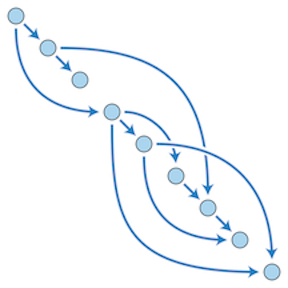

### Moving through graphs

* path : the route from one node to another
* shortest path: the shortest possible route from one to another


## Node Centrality

* **Degree Centrality**: How many connections does a node have?


## $$\frac{\#\ of\ neighbors\ a\ node\ has}{\#\ of\ neighbors\ it\ could\ possibly\ have}$$

Normalized ^^

---
 * **Betweenness Centrality**: How important is an individual node to a network? Captures bottlenecks
 
 
<img  src ="./resources/betweenness_formula.svg">
 
    
where $\sigma_{st}$ is the total number of shortest paths from node *s* to node *t* and $\sigma_{st}(v)$ is the number of paths that pass through v



## $$\frac{\#\ of\ shortest\ paths\ moving\ from\ one\ node\ to\ another\ including \ node\ of\ interest}{\#\ all\ possible\ shortest\ paths\ from\ one\ node\ to\ another}$$

---

* **Closeness Centrality**:  Calculated as the reciprocal of the sum of the length of the shortest paths between the node and all other nodes in the graph. Thus, the more central a node is, the closer it is to all other nodes.

<img src ="./resources/closeness.svg">  
where $\displaystyle d(y,x)$ is the distance between vertices $\displaystyle x$ and $\displaystyle y$ 

https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0165781

In [ ]:
# Let's try all this in code
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from operator import itemgetter
%matplotlib inline

In [ ]:
book1_df = pd.read_csv('./resources/asiof/asoiaf-book1-edges.csv')
book1_df.head()

In [ ]:
g1 = nx.Graph()
for row in book1_df.iterrows():
    g1.add_edge(row[1]['Source'], row[1]['Target'],
                weight=row[1]['weight'], book=row[1]['book'])

# see all of the nodes
g1.nodes()

In [ ]:
# see all of the edges
g1.edges()

In [ ]:
# find neighbors of Tyrion Lannister
[x for x in g1.neighbors('Tyrion-Lannister')];

In [ ]:
# degree centrality
nx.degree_centrality(g1);

In [ ]:
# betweenness centrality (weighted and unweighted)
nx.betweenness_centrality(g1)

In [ ]:
key_max = max(nx.betweenness_centrality(g1), key=(lambda k:nx.betweenness_centrality(g1)[k]))
print(nx.betweenness_centrality(g1)[key_max])

# Common Applications of Networks

1. Community Detection (Clustering)
2. Recommendation Engines

## Community Detection
### Cliques
<img src ="./resources/clique_mean_girls.jpg">


## Not this ^^^

---

#### Clique: a subset of vertices in an undirected graph, such that every pair of vertices are adjacent to one another
* Maximum Clique: the largest clique
* Maximal Clique: a clique that, if an additional vertex was added, would no longer be a clique

How many maximal cliques are there in the diagram below? What is the maximum clique?

<img src = "./resources/too_many_cliques.png">

How could we create a simple recommendation system from a clique?


### Clustering Techniques

If we want to find nodes that are clustered together, take a look at common techniques 

#### k-clique community clustering algorithm



<img src = "./resources/k_clique_clustering.png">

A graph with
- 23 × 1-vertex cliques (the vertices),
- 42 × 2-vertex cliques (the edges),
- 19 × 3-vertex cliques (light and dark blue triangles), and
- 2 × 4-vertex cliques (dark blue areas).

The 11 light blue triangles form maximal cliques. The two dark blue 4-cliques are both maximum and maximal, and the clique number of the graph is 4.

###  Girvan-Newman clustering algorithm
   1. The betweenness of all existing edges in the network is calculated first.
   2. The edge with the highest betweenness is removed.
   3. The betweenness of all edges affected by the removal is recalculated.
   4. Steps 2 and 3 are repeated until no edges remain.
    
    
#### What does this remind you of?


<img src ="./resources/gn.jpg">

#### Let's see which works better with the GOT network:

In [ ]:
# Code Examples from GOT
from networkx.algorithms.community import k_clique_communities
k_clique = k_clique_communities(g1, 3)
dict(enumerate(k_clique))

In [ ]:
from networkx.algorithms.community import girvan_newman
community = girvan_newman(g1)
comm_iter1 = tuple(sorted(c) for c in next(community))
dict(enumerate(comm_iter1))


Evaluating network clustering algorithms (https://journals.plos.org/plosone/article/file?id=10.1371/journal.pone.0159161&type=printable)

## Recommendations

####  Ego Network: A subset of a graph composed of a central node (ego) and all of the nodes the ego is connected to (alters)  

A simple recommendation system is: given an ego node, recommend items that are contained with it's ego network

<img src = "./resources/egonet3.jpg">

http://www.steveborgatti.com/papers/egobet.pdf

In [ ]:
fhr = open('./resources/books_meta.txt', 'r',
           encoding='utf-8', errors='ignore')
books_meta_dict = {}
fhr.readline()

# Parse data from each ASIN entry
for record in fhr:

    # Split the record attributes on TAB
    attr = record.split('\t')

    # Create a meta dictionary
    meta = {}

    # Read the attributes into key = ASIN , value= meta - where meta is a dictionary of attributes (except ASIN)
    meta['Id'] = attr[0].strip()
    ASIN = attr[1].strip()
    meta['Title'] = attr[2].strip()
    meta['Categories'] = attr[3].strip()
    meta['Group'] = attr[4].strip()

    # Convert numeric data to integers and floats accordingly
    meta['SalesRank'] = int(attr[5].strip())
    meta['TotalReviews'] = int(attr[6].strip())
    meta['AvgRating'] = float(attr[7].strip())
    meta['DegreeCentrality'] = int(attr[8].strip())
    meta['ClusteringCoeff'] = float(attr[9].strip())

    # Write metadata as value with key ASIN
    books_meta_dict[ASIN] = meta

# Close the file reader
fhr.close()
len(books_meta_dict)

In [ ]:
file = open("./resources/books_data.edgelist", 'rb')
books_copurchase = nx.read_weighted_edgelist(file)
file.close()
print(nx.info(books_copurchase))

In [ ]:
print("Your Purchased Book")
print("-----------------")
asin = '0873376129'

# Print out the features associates with the book

print("\nTitle = ", books_meta_dict[asin]['Title'])
print("ASIN = ", asin)
print("SalesRank = ", books_meta_dict[asin]['SalesRank'])
print("TotalReviews = ", books_meta_dict[asin]['TotalReviews'])
print("AvgRating = ", books_meta_dict[asin]['AvgRating'])
print("DegreeCentrality = ", books_meta_dict[asin]['DegreeCentrality'])
print("ClusteringCoeff = ", books_meta_dict[asin]['ClusteringCoeff'])

In [ ]:
ego = nx.ego_graph(books_copurchase, asin, radius=1)
print("Ego Network for", books_meta_dict[asin]['Title'],
      "\nNodes =", ego.number_of_nodes(),
      "\nEdges =", ego.number_of_edges())

In [ ]:
# Draw the ego network
nx.draw(ego, with_labels=True)


<img src ="./resources/social_network.jpg">

## Additional Resources

Awesome projects related to graph theory/networks (http://snap.stanford.edu/class/cs224w-2017/projects.html)  
Paper on recommender systems (http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.480.5927&rep=rep1&type=pdf)   
Another paper on recommender system (http://www.cs.cmu.edu/~jure/pubs/viral-tweb.pdf)  
More on clustering networks (http://pages.di.unipi.it/marino/cluster18.pdf)

# More NetworkX Practice

## Graph Properties

In [ ]:
G = nx.lollipop_graph(5, 4)

In [ ]:
nx.draw(G)

In [ ]:
# This prints the source node and the dictionary of shortest lengths to various nodes
pathlengths = []
for v in G.nodes():
    spl = nx.single_source_shortest_path_length(G, v)
    print('%s %s' % (v, spl))
    for p in spl.values():
        pathlengths.append(p)

In [ ]:
print("average shortest path length %s" % (sum(pathlengths)/len(pathlengths)))

In [ ]:
# histogram of path lengths
dist = {}
for p in pathlengths:
    if p in dist:
        dist[p]+=1
    else:
        dist[p]=1
print("length #paths")
verts = dist.keys()
for d in sorted(verts):
    print('%s %d' % (d,dist[d]))

In [ ]:
print("radius: %d" % nx.radius(G))
print("diameter: %d" % nx.diameter(G))
print("eccentricity: %s" % nx.eccentricity(G))
print("center: %s" % nx.center(G))
print("periphery: %s" % nx.periphery(G))
print("density: %s" % nx.density(G))

## Path Graphing

In [ ]:
g1 = nx.path_graph(8)

In [ ]:
nx.draw(g1)

## Four Implementations of the Same Graph

In [ ]:
g5 = nx.grid_2d_graph(4, 4)  # 4x4 grid

In [ ]:
pos = nx.spring_layout(g5, iterations=50)

In [ ]:
nx.draw(g5, pos, font_size=8)

In [ ]:
nx.draw(g5, pos, node_color='k', node_size=250, with_labels=False)

In [ ]:
nx.draw(g5, pos, node_color='g', node_size=250, with_labels=False, width=6)

In [ ]:
h5 = g5.to_directed()
nx.draw(h5, pos, node_color='b', node_size=250, with_labels=False)

## Degrees

In [ ]:
G = nx.gnp_random_graph(100, 0.02)

In [ ]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)

In [ ]:
dmax = max(degree_sequence)
dmax

In [ ]:
gcc = sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)[0]

In [ ]:
pos = nx.spring_layout(gcc)

In [ ]:
nx.draw_networkx_nodes(gcc, pos, node_size=20)

In [ ]:
nx.draw_networkx_edges(gcc, pos, alpha=0.8)

In [ ]:
nx.draw_networkx_nodes(gcc, pos, node_size=20)
nx.draw_networkx_edges(gcc, pos, alpha=0.4)

In [ ]:
plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")
plt.axes([0.45,0.45,0.45,0.45])
plt.axis('off')
plt.show()

## Edge Colormap

In [ ]:
g2 = nx.star_graph(7)

In [ ]:
pos = nx.spring_layout(g2)

In [ ]:
nx.draw_networkx(g2, pos, node_color='#A0CBE2',
                 edge_color=range(7), width=4,
                 edge_cmap=plt.cm.Blues, with_labels=False)

## Ego Graph

In [ ]:
g3 = nx.generators.barabasi_albert_graph(1000, 2)

node_and_degree = dict(g3.degree())

largest_hub, degree = sorted(node_and_degree.items(), key=itemgetter(1))[-1]

hub_ego = nx.ego_graph(g3, largest_hub)

pos = nx.spring_layout(hub_ego)

nx.draw(hub_ego, pos, node_color='b', node_size=50, with_labels=False)
nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub],
                       node_size=300, node_color='r')

## GML Example: Football Teams

First, we download a ZIP file containing information about United States college football teams and extract the two text files contained within.

In [ ]:
import io
import zipfile

import networkx
import requests

url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"
response = requests.get(url)
content = io.BytesIO(response.content)
with zipfile.ZipFile(content) as zf:  # zipfile object
    txt = zf.read('football.txt').decode()  # read info file
    gml = zf.read('football.gml').decode()  # read gml data
    # throw away bogus first line with # from mejn files
    gml = gml.split('\n')[1:]

Then we parse the graph information from the GML file, convert that to a NetworkX graph object, then print the degree of each node in the graph, which represents the number of games played by each team.

In [ ]:
import networkx as nx

fb = nx.parse_gml(gml) # parse gml data

print(txt)
# print degree for each team - number of games
for n, d in fb.degree():
    print(f'{n} {d}')

In [ ]:
pos = nx.spring_layout(fb, iterations=100)

In [ ]:
nx.draw(fb, pos, font_size=8)